In [1]:
from hemlock import User, Page
from hemlock.app import create_test_app
from hemlock.questions import Label

app = create_test_app()

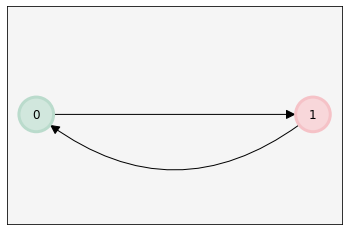

In [2]:
def make_branch():
    return [
        zeroeth_page:=Page(
            Label("Zeroeth page"),
            navigate=make_next_branch
        ),
        Page(
            Label("First page"),
            back=True,
            prev_page=zeroeth_page,
            terminal=True
        )
    ]


def make_next_branch(root):
    return [
        Page(
            Label("Zeroeth page on the zeroeth page's branch")
        ),
        Page(
            Label("First page on the zeroeth page's branch"),
            navigate=make_another_branch
        )
    ]


def make_another_branch(root):
    return Page(
        Label("Zeroeth page on the zeroeth page's first page's branch")
    )


user = User.make_test_user(make_branch)
user.test_get().display()

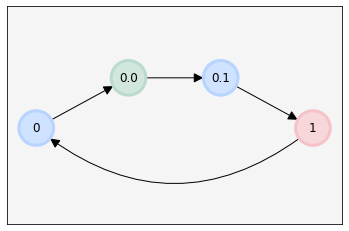

In [3]:
user.test_request().display()

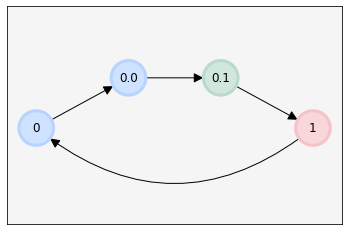

In [4]:
user.test_request().display()

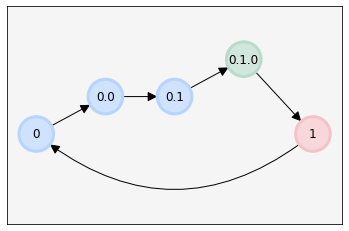

In [5]:
user.test_request().display()

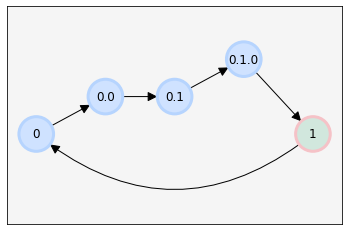

In [6]:
user.test_request().display()

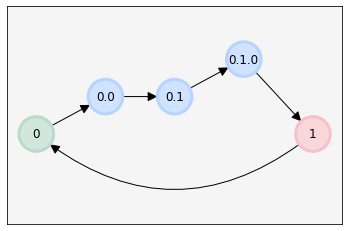

In [7]:
user.test_request(direction="back").display()

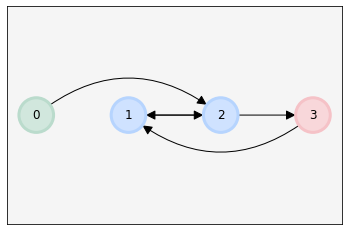

In [8]:
def make_zeroeth_branch():
    branch = [
        Page(
            Label("Zeroeth page")
        ),
        first_page:=Page(
            Label("First page")
        ),
        Page(
            Label("Second page"),
            back=True
        ),
        Page(
            Label("Third page"),
            back=True,
            prev_page=first_page,
            terminal=True
        )
    ]
    branch[0].next_page = branch[2]
    return branch


user = User.make_test_user(make_zeroeth_branch)
user.test_get().display()

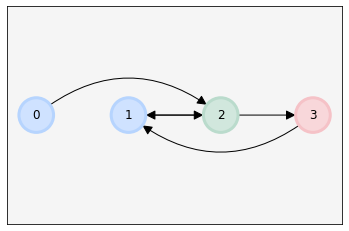

In [9]:
user.test_request().display()

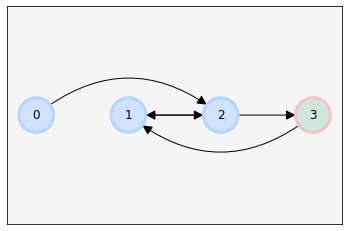

In [10]:
user.test_request().display()

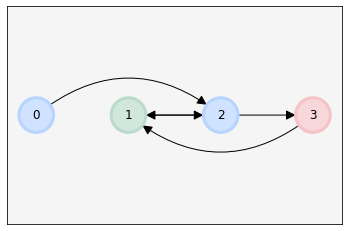

In [11]:
user.test_request(direction="back").display()